# Human Activity Detection (HAR)

## Task 1 : Exploratory Data Analysis (EDA) [3 marks]

### Importing Requried Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

### Generating the training and testing sets using the code provided in `MakeDataset.py`

In [3]:
# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")
print("Combined Directory: ",combined_dir)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:
        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Combined Directory:  Combined
Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


### Printing the datasets

In [4]:
X_train

array([[[ 1.19648   , -0.1606898 , -0.740178  ],
        [ 1.22203   , -0.2672951 , -0.7717485 ],
        [ 1.22311   , -0.4338634 , -0.7678422 ],
        ...,
        [ 0.4974957 , -0.2795907 , -0.2029592 ],
        [ 0.5064167 , -0.286091  , -0.2564634 ],
        [ 0.5609918 , -0.302237  , -0.2553743 ]],

       [[ 0.253887  ,  0.6446213 ,  0.7305601 ],
        [ 0.2547409 ,  0.6470096 ,  0.7330282 ],
        [ 0.256914  ,  0.6468081 ,  0.7354798 ],
        ...,
        [ 0.2489302 ,  0.642803  ,  0.7323693 ],
        [ 0.2503708 ,  0.6447095 ,  0.7369245 ],
        [ 0.2513104 ,  0.6440663 ,  0.735841  ]],

       [[ 0.9736077 , -0.1844755 , -0.2821974 ],
        [ 0.9760866 , -0.1867793 , -0.2848794 ],
        [ 0.977865  , -0.191836  , -0.2891687 ],
        ...,
        [ 0.9779202 , -0.1834941 , -0.2829651 ],
        [ 0.9796224 , -0.1832831 , -0.279844  ],
        [ 0.9775468 , -0.1833646 , -0.2764387 ]],

       ...,

       [[ 0.1943966 ,  0.5317094 ,  0.834933  ],
        [ 0

In [5]:
y_train

array([2, 6, 5, 2, 2, 2, 1, 1, 5, 4, 1, 4, 1, 1, 6, 2, 3, 1, 1, 4, 3, 3,
       5, 6, 5, 1, 3, 6, 4, 5, 5, 2, 5, 1, 1, 6, 4, 3, 3, 3, 3, 4, 6, 3,
       4, 1, 2, 2, 6, 5, 5, 3, 6, 6, 4, 3, 4, 2, 4, 5, 5, 5, 5, 4, 6, 6,
       4, 5, 3, 4, 3, 1, 4, 4, 3, 1, 5, 2, 3, 6, 1, 4, 2, 2, 5, 2, 1, 3,
       6, 6, 2, 5, 6, 1, 3, 5, 2, 3, 4, 4, 2, 5, 1, 1, 1, 3, 4, 5, 6, 1,
       3, 6, 5, 4, 2, 2, 6, 2, 6, 6, 3, 1, 4, 6, 2, 2])

In [6]:
X_test

array([[[ 1.293474  , -0.3140436 , -0.2480047 ],
        [ 1.258798  , -0.2909032 , -0.5137133 ],
        [ 1.258902  , -0.3451832 , -0.505633  ],
        ...,
        [ 0.6532789 , -0.02082443, -0.06393618],
        [ 0.7110597 , -0.1404382 , -0.00802015],
        [ 0.8174469 , -0.2235447 , -0.02307176]],

       [[ 1.434661  , -0.05939444, -0.02845588],
        [ 1.296278  , -0.1877494 , -0.1174267 ],
        [ 1.258498  , -0.3651272 , -0.3176294 ],
        ...,
        [ 1.394106  , -0.1194037 , -0.05702037],
        [ 1.357133  , -0.250589  , -0.09830713],
        [ 1.132523  , -0.3707452 , -0.3169228 ]],

       [[ 1.366494  , -0.7318806 , -0.4718869 ],
        [ 1.26813   , -0.7460761 , -0.3882869 ],
        [ 0.9414338 , -0.723163  , -0.3032955 ],
        ...,
        [ 0.8503702 , -0.2442238 , -0.09826379],
        [ 0.9722911 , -0.2435999 , -0.09519318],
        [ 1.056756  , -0.2600851 , -0.1337024 ]],

       ...,

       [[ 0.1472669 ,  0.9113154 ,  0.3883553 ],
        [ 0

In [7]:
y_test

array([3, 1, 2, 5, 5, 1, 1, 5, 3, 2, 6, 5, 6, 5, 6, 1, 6, 5, 2, 5, 4, 3,
       2, 2, 1, 4, 6, 4, 1, 2, 6, 2, 4, 4, 3, 6, 6, 3, 1, 5, 3, 2, 1, 4,
       4, 4, 5, 1, 3, 3, 3, 6, 2, 4])

### Question 1

Q1. Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

**Answer:**

The following 6x3 subplot shows the accelerometer data for the first person:

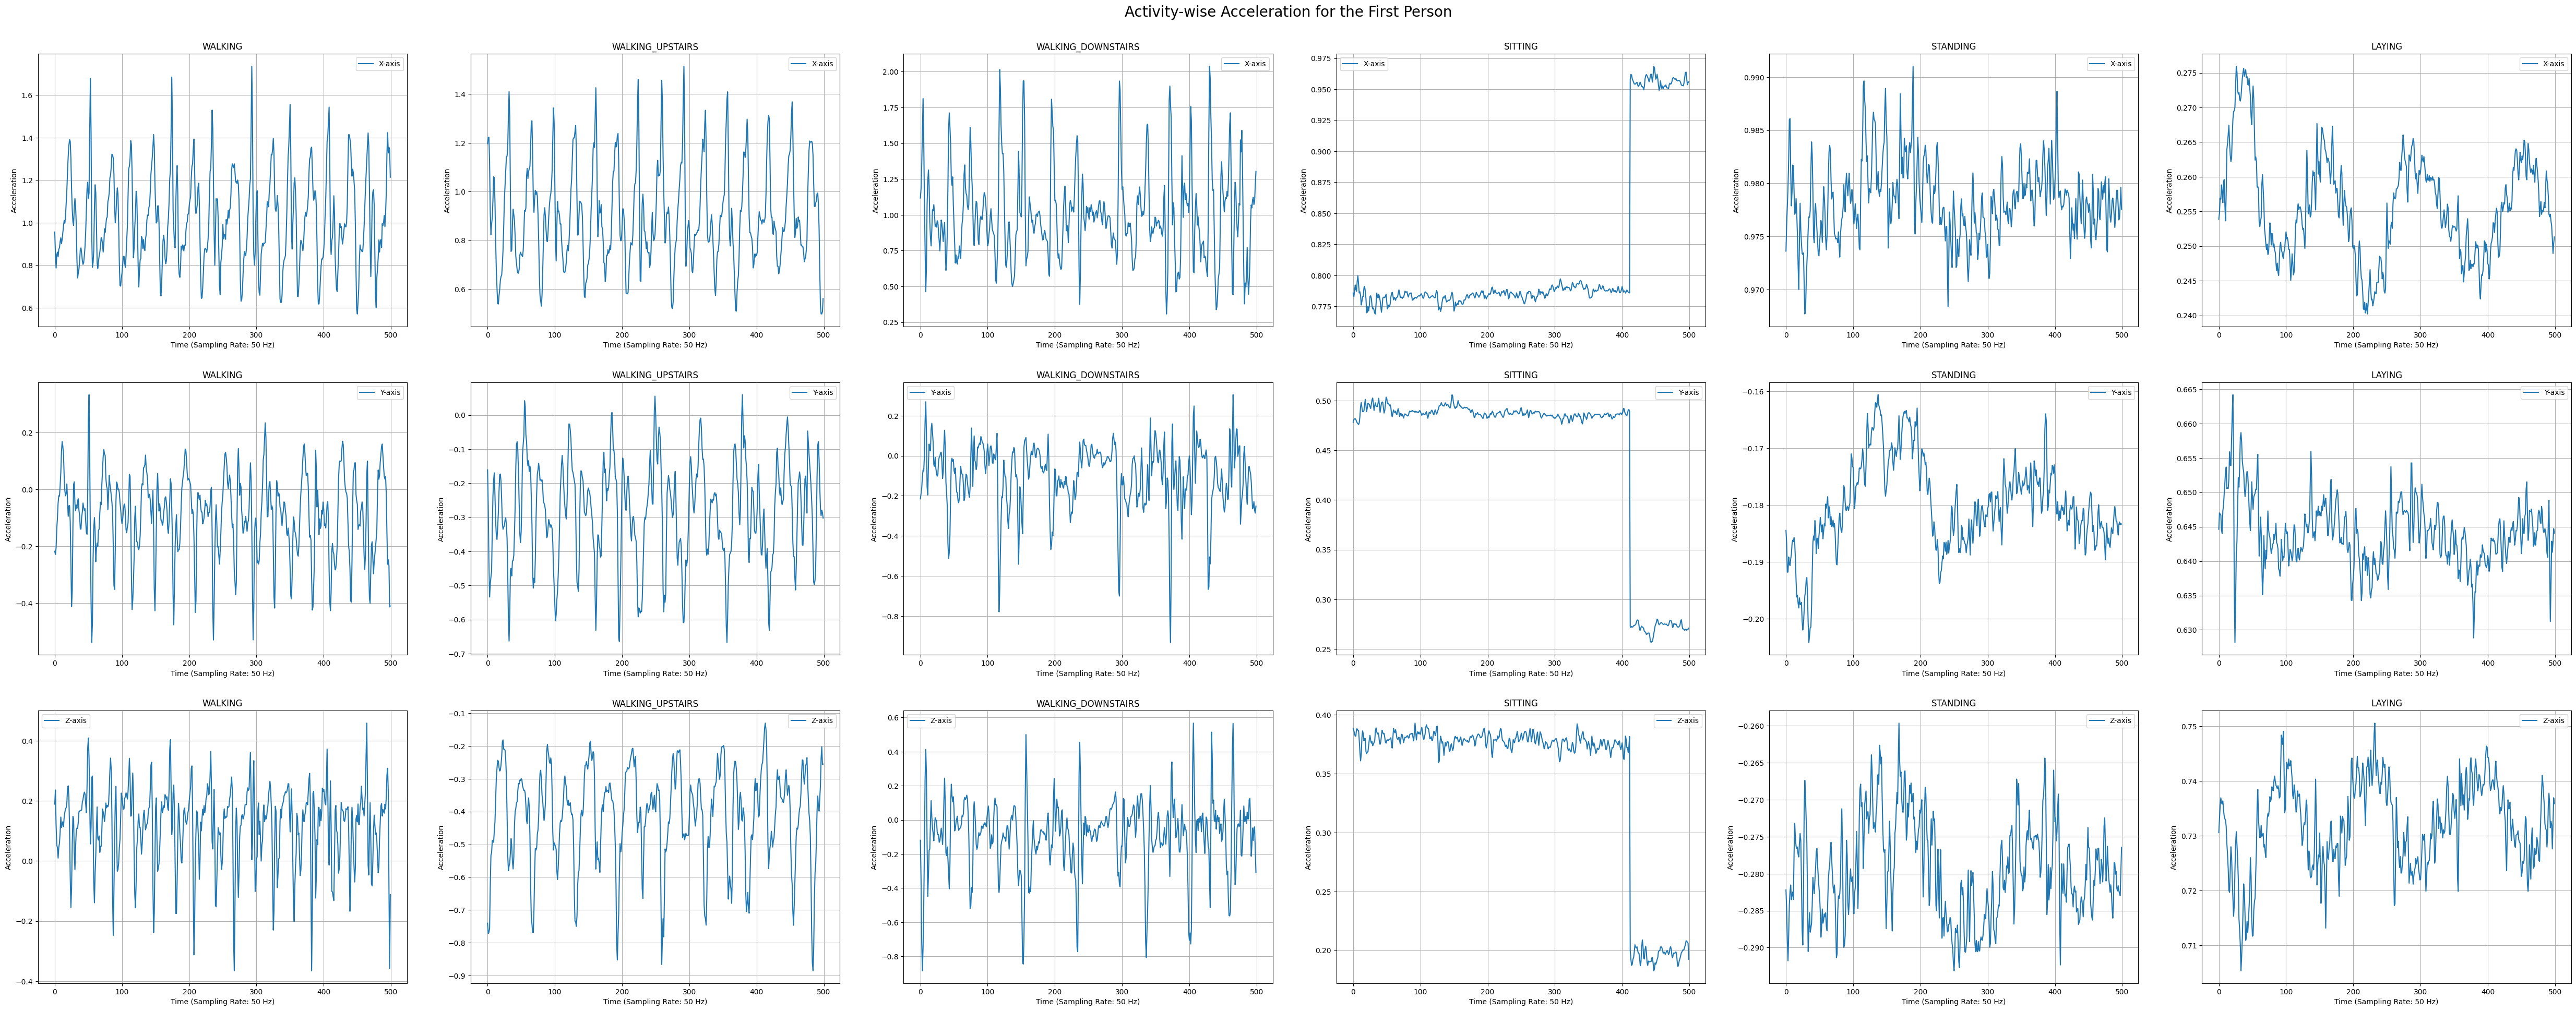

In [28]:
activity_classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}
directions = ["X-axis","Y-axis","Z-axis"]

# create subplot for each class
fig, axes = plt.subplots(3, 6, figsize=(50,20))
fig.suptitle("Activity-wise Acceleration for the First Person", fontsize=20)

for activity_class, i in activity_classes.items():
    acc_data = X_train[y_train==i]   # get the accelerometer data for the class
    acc_data_p1 = acc_data[0]        # get the accelerometer data for the first person

    for j, direction in enumerate(directions):
        axes[j,i-1].set_title(activity_class)
        axes[j,i-1].plot(acc_data_p1[:,j], label=direction)
        axes[j,i-1].legend()
        axes[j,i-1].set_xlabel("Time (Sampling Rate: 50 Hz)")
        axes[j,i-1].set_ylabel("Acceleration")
        axes[j,i-1].grid()


plt.tight_layout(pad=3.0)
plt.show()

The different activities show noticeable differences in their directional waveforms. The range of acceleration and peaks differ for all the activies. At first glance, we can observe that the dynamic activies like walking, walking upstairs, and walking downstairs have multiple peaks that vary in width and height. This makes them stand out from the static activities like sitting, standing, and laying, which have smoother waveforms with less variations.

So far, we have learnt Decision Trees and Random Forest in the course. Both of these models will not be able to accurately classify the activities because these models dont perform well on sequential time-series data having temporal dependencies as they dont consider the order in which activities are performed or samples are taken. Although, we can perform a simple classification between the dynamic and static activities, if we add additional features like mean, median, max acceleration and variance.